PS3 - De Becker, Di, Gallese, Martiriggiano

In this assignment we will explore network analytics methods using patent data from Google Biq Query. Later in the report we show how to analyse the data that was uploaded on moodle.

In [1]:
# Import needed packages 

import networkx as nx
import csv 
import random
import collections
import operator
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import networkx.algorithms.community

### SQL DATA 

In [2]:
# Hereafter the code used to queery the data from the Google Patent dataset, and in a separate file attached to the submission you can find also the result



### Initial Exploration

For the assignment it is decided to use the data provided on Moodle as we managed to queery the data from the Google database just today as a student in our group decided to use his credit card and we weren't sure if the data we collected were valid especially because the map of the graph was very dense.

First let's ask for some information regarding our directed graph which doesn't have any weights and let's visualize it using draw (G)

In [3]:
# Read the file and get some info on the nodes, edges, and average degree of our network

G = nx.read_edgelist('Network.txt')
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 4039\nNumber of edges: 88234\nAverage degree:  43.6910'

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


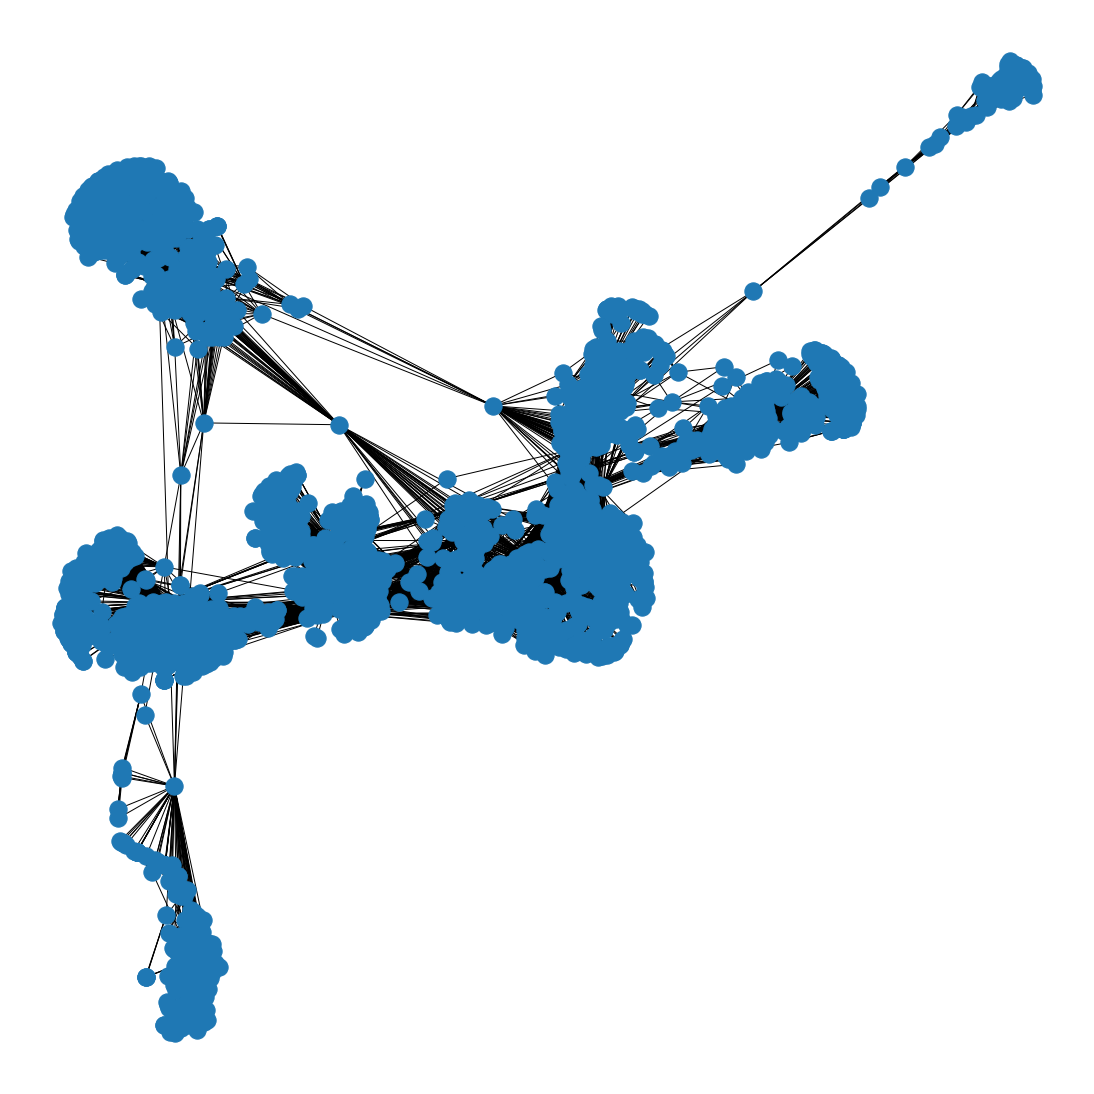

In [4]:
plt.figure(figsize=(15, 15))
nx.draw(G)
plt.show()

# Analysis

#### Degree Distribution

Since the degree of a network is one of the most important features, let's give a look to what our network is like from this point of view

Text(0.5, 0, 'Degree')

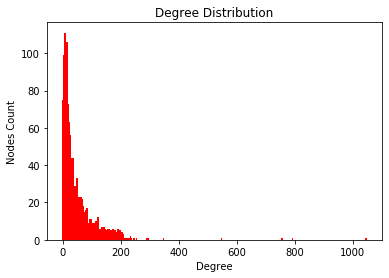

In [5]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # enumerating through the nodes to ask for degree and sorting them from biggest to smallest

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt,width=5, color='r')

plt.title("Degree Distribution")
plt.ylabel("Nodes Count")
plt.xlabel("Degree")

It can be observed that most of the nodes have few links, but there are some players which gets to more than 1000 links. This is an important observation to identify players which are more important in the patent competition.

#### Centrality

Since the purpose is to find the most central patents (with highest number of links), let's analyze this feature in our network

In [6]:
# define a function to calculate centrality 
def centrality(G, nodes):
    degrees = [val for (node, val) in G.degree()] #only the values
    nodes = [node for (node, val) in G.degree()] #only the node

    cen = [x for _,x in sorted(zip(degrees,nodes), reverse=True)]
    return cen

# calculate centrality
centrality = centrality(G, list(G.nodes))
centrality_10 = centrality[:10]

#find the most connected nodes
most_con_nodes = G.degree(centrality)

print("Most connected nodes")
for i in range(10):
    print(f"Position #{i+1}: node {list(most_con_nodes)[i][0]} with degree {list(most_con_nodes)[i][1]}")

Most connected nodes
Position #1: node 107 with degree 1045
Position #2: node 1684 with degree 792
Position #3: node 1912 with degree 755
Position #4: node 3437 with degree 547
Position #5: node 0 with degree 347
Position #6: node 2543 with degree 294
Position #7: node 2347 with degree 291
Position #8: node 1888 with degree 254
Position #9: node 1800 with degree 245
Position #10: node 1663 with degree 235


Text(0.5, 0, 'Degree')

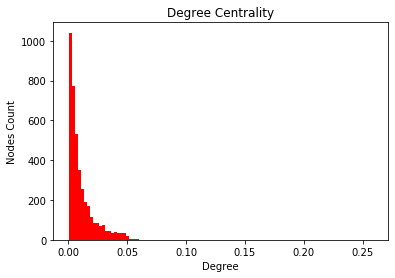

In [7]:
fig, ax = plt.subplots()
degree_cent_ntw=nx.degree_centrality(G)
degree_hist = plt.hist(list(degree_cent_ntw.values()), 100, color = 'r')

plt.title("Degree Centrality")
plt.ylabel("Nodes Count")
plt.xlabel("Degree")

#### Visualize the network using different size and colors based on the betweenness centrality of the nodes

(-0.5883794751770179,
 0.553475054801194,
 -0.586748441353846,
 1.0766315661821846)

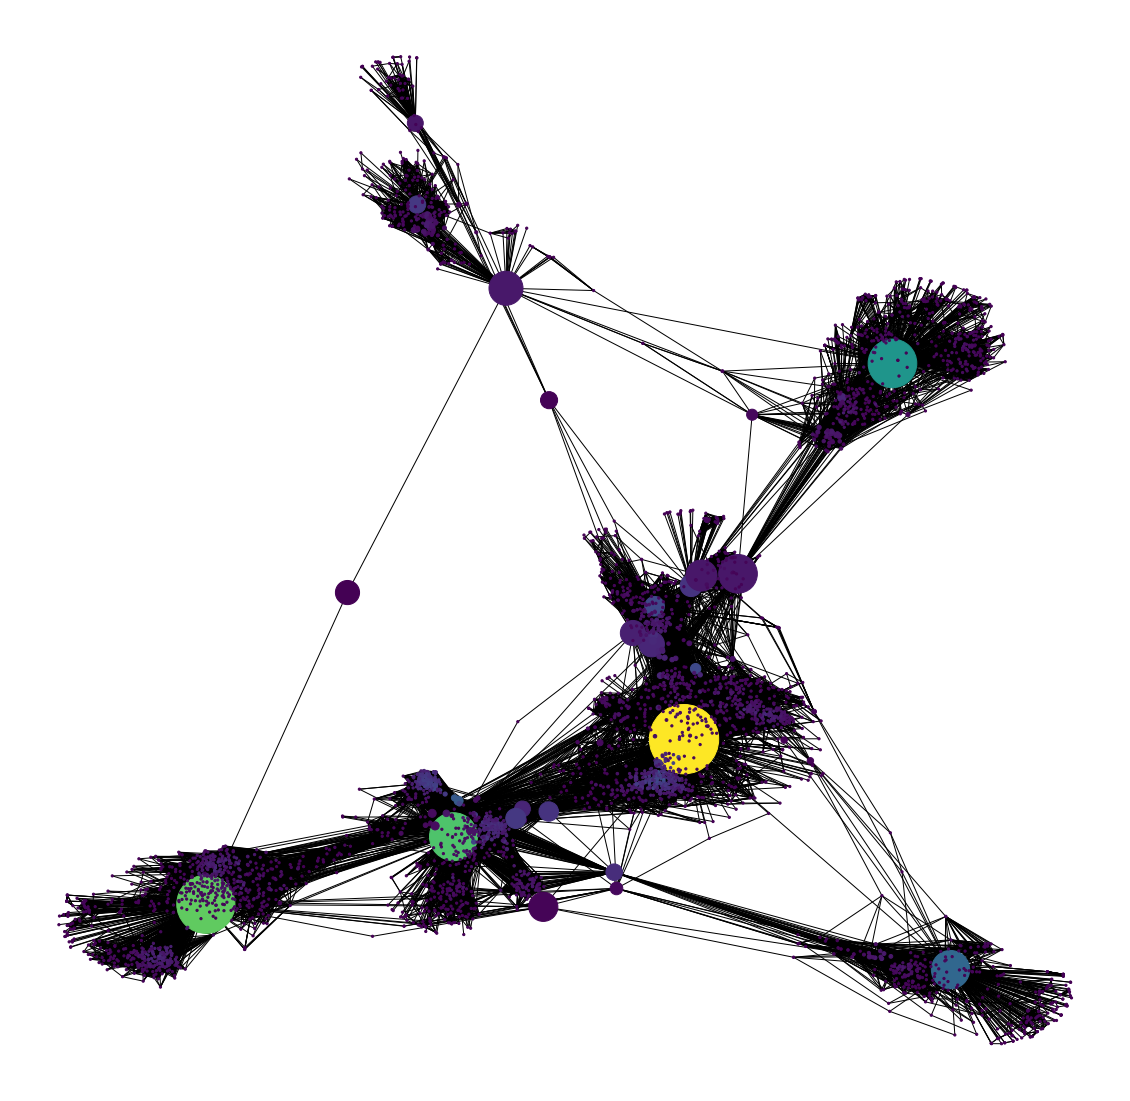

In [8]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

### Page Rank

The pagerank algorithm is invented by Google to rank the web pages in its research algorithm. It encodes the web graph through an incidence matrix in which every element is equal to 1 if there is a link between the two nodes, and 0 otherwise.

This algorithm uses a Markov chain that mimics a virtual random surfer in which the surfer moves from node i to j with probability p*Aij/ni, where p is a factor selected by the coder and ni is the number of links out of node i, and to a random node with probability (1-p)/ni.

Running this algorithm, a rank is built where the PageRank of each page i represents the stationary probability of being in node i. Therefore, the higher the rank of i, the higher its importance.

Note: Google usually sets p=85% to make the rate of convergence fast enough, therefore, there same factor will be used.

In [9]:
# Calculating the page rank

Rank = nx.pagerank(G, alpha=0.85)
Rank_df = pd.DataFrame.from_dict(Rank, orient = "index", columns = ["Rank"])
Rank_df.sort_values(by = ["Rank"], ascending = False).head(20)

,Rank
3437,0.007615
107,0.006936
1684,0.006367
0,0.006290
1912,0.003877
348,0.002348
686,0.002219
3980,0.002170
414,0.001800
698,0.001317


It can be observed that the node 3437 is the one with the highest ranking, and that it was also the 4th in the chart based on centrality. Moreover, node 107, which was the 1st in the chart based on the centrality, is the second with the highest rank.

We can conclude that these two nodes are most probably very important in this network.

### Cluster Analysis